In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.qaoa.models.MaxCutProblem import MaxCutProblem

def visualize(data, x,y, hues, chart):
    fig = plt.figure(figsize=(12,9))
    match chart:
        case 'line':
            chart_type = sns.lineplot
        case 'bar':
            chart_type = sns.barplot
        case 'box':
            chart_type = sns.boxplot

    # make a copy to avoid modifying the original DataFrame and avoid warnings
    data_to_plot = data.copy()

    try:
        if len(hues) > 1:
            data_to_plot['hues'] = data_to_plot[hues].astype(str).agg('-'.join, axis=1)
            _ = chart_type(data=data_to_plot, x=x, y=y, hue='hues', palette='viridis')
            plt.legend(title=f'{y} for {x}, sorted by {[h + ", " for h in hues]}', bbox_to_anchor=(1.05, 1), loc='upper left')
        elif len(hues) == 1:
            data_to_plot['hues'] = data_to_plot[hues[0]]
            _ = chart_type(data=data_to_plot, x=x, y=y, hue='hues', palette='viridis')
            plt.legend(title=f'{y} for {x}, sorted by {[h + ", " for h in hues]}', bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            _ = chart_type(data=data_to_plot, x=x, y=y)
            plt.legend(title=f'{y} for {x}, sorted by {[h + ", " for h in hues]}', bbox_to_anchor=(1.05, 1), loc='upper left')
            #plt.show()

            plt.axhline(y=1, color='red', linestyle='--', linewidth=2)

        plt.axhline(y=1, color='red', linestyle='--', linewidth=2)
        plt.show()
        plt.close(fig)
    except (KeyError, ValueError) as e:
        print(f"You've passed an incorrect column name.\n The correct ones are: \n{data_to_plot.columns}\nException: {e}")


### Configure the results you want to visualize under.

#### Pick multiple hues with ctrl or shift + click.
#### The "Exclude bad" removes the warm started hamming distances of >0 from the dataset.


In [ ]:
import ast
import numpy as np



strings = [
    "results/results_papergraph_qaoa_variant_{'multiangle', 'vanilla'}_depth_{2, 4, 6, 8, 10}.csv",
    "results/results_papergraph_depth_{2, 4, 6, 8, 10}_hamming_dist_{2, 4, 6}.csv",
    "results/results_papergraph_depth_{2, 4, 6}_hamming_dist_{2, 4, 6}.csv",
    "results/results_papergraph_depth_{8, 10}_hamming_dist_{2, 4, 6}.csv"
]
strings = [
    "results/results_statevector_HD135_all.csv",
    "results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'multiangle'},'param_initialization'{'gaussian'},'depth'{1},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{1},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{1},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{4},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{4},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{7},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{7},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv",
"results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'multiangle','vanilla'},'param_initialization'{'gaussian'},'depth'{1,4},'warm_start'{True},'problem_type'{'minvertexcover'},'lagrangian_multiplier.csv",
"results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'multiangle','vanilla'},'param_initialization'{'gaussian'},'depth'{1,4},'warm_start'{False,True},'problem_type'{'minvertexcover'},'lagrangian_mult.csv"]
for file in strings:
    try:
        df = pd.read_csv(file)
        #print(f"File: {file}")
        #print(df['graph_name'].value_counts())
        #print("\n")
    except FileNotFoundError:
        print(f"File not found: {file}")

if len(strings) >1:
    results = pd.concat([pd.read_csv(path,index_col=0) for path in strings])

else:
    results = pd.read_csv(strings[0])



In [10]:

strings = [
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{1},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{1},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{4},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{4},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{7},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{7},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'multiangle'},'param_initialization'{'gaussian'},'depth'{1},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv"]


def analyze_file_counts(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"\nAnalyzing: {file_path}")
        
        # Extract parameters from filename
        qaoa_variant = "unknown"
        depth = "unknown"
        
        if "'qaoa_variant'" in file_path:
            variant_start = file_path.find("'qaoa_variant'") + len("'qaoa_variant'{")
            variant_end = file_path.find("}", variant_start)
            qaoa_variant = file_path[variant_start:variant_end].replace("'", "")
        
        if "'depth'" in file_path:
            depth_start = file_path.find("'depth'{") + len("'depth'{")
            depth_end = file_path.find("}", depth_start)
            depth = file_path[depth_start:depth_end]
        
        # Group by the relevant columns and count
        if 'hamming_dist' in df.columns:
            grouped = df.groupby(['warm_start', 'hamming_dist', 'graph_name']).size().reset_index(name='count')
        else:
            # If hamming_dist is not in the dataframe, use only warm_start and graph_name
            grouped = df.groupby(['warm_start', 'graph_name']).size().reset_index(name='count')
            # Add a hamming_dist column with NaN values
            grouped['hamming_dist'] = np.nan
        
        # Print the results
        for _, row in grouped.iterrows():
            warm_start = row['warm_start']
            hamming_dist = row['hamming_dist']
            graph_name = row['graph_name']
            count = row['count']
            
            # Format the hamming_dist part of the message
            if pd.isna(hamming_dist):
                hamming_part = ""
            else:
                hamming_part = f", hamming_dist {hamming_dist}"
            
            print(f"For {qaoa_variant} and depth {depth} the combination (warm_start={warm_start}{hamming_part}, graph={graph_name}) has {count} entries and needs {50-count} more.")
        
        return df
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

# Process each file
for file_path in strings:
    analyze_file_counts(file_path)


Analyzing: results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{1},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv
For vanilla and depth 1 the combination (warm_start=False, hamming_dist 0, graph=>>graph6<<Emz_) has 50 entries and needs 0 more.
For vanilla and depth 1 the combination (warm_start=False, hamming_dist 0, graph=>>graph6<<Hh_iS_u) has 50 entries and needs 0 more.
For vanilla and depth 1 the combination (warm_start=False, hamming_dist 0, graph=>>graph6<<HmzffJz) has 50 entries and needs 0 more.
For vanilla and depth 1 the combination (warm_start=False, hamming_dist 0, graph=>>graph6<<KmzffJznl{hU) has 50 entries and needs 0 more.
For vanilla and depth 1 the combination (warm_start=True, hamming_dist 0, graph=>>graph6<<Emz_) has 50 entries and needs 0 more.
For vanilla and depth 1 the combination (warm_start=True, hamming_dist 0, graph=>>graph6<<Hh_iS_u) has 50 entries and needs 0 mor

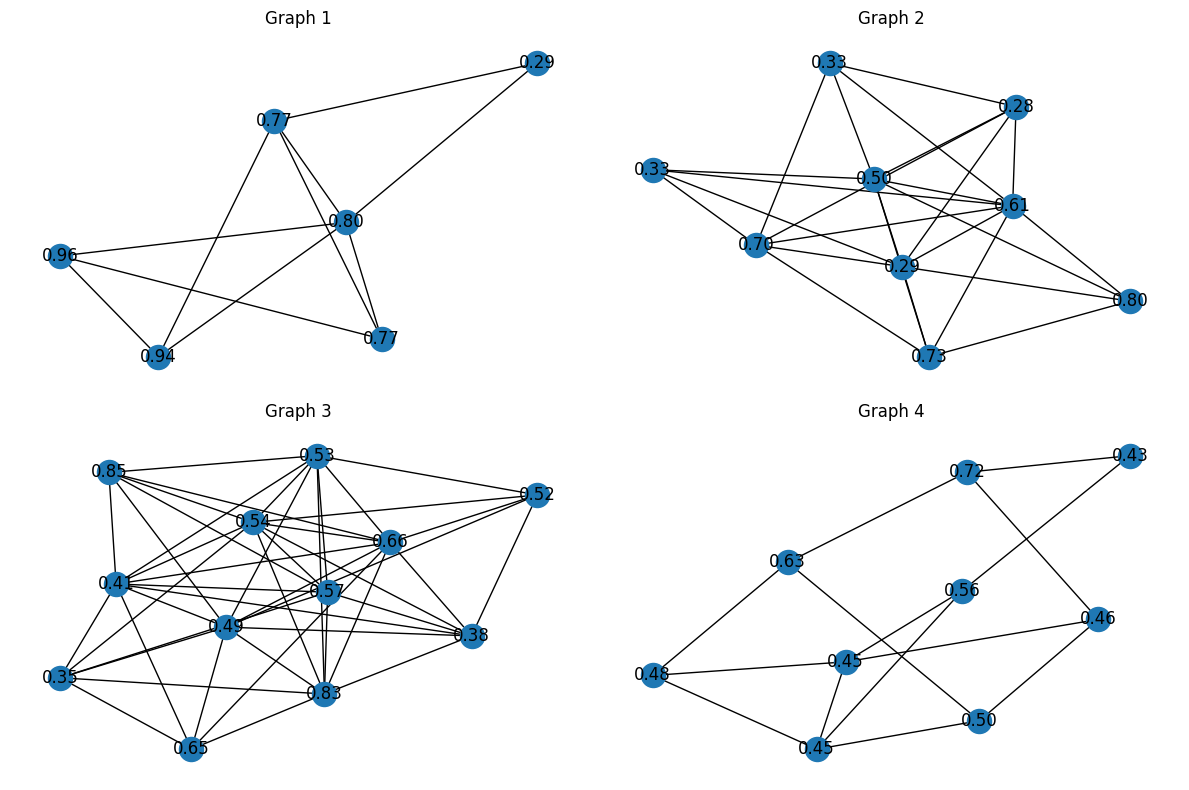

0.7974238714485382
0.7700612176014103
0.956440762925937
0.2947390450335806
0.76789072804424
0.9417981392599122


In [4]:
from rustworkx.visualization import mpl_draw as draw_graph
problem = MaxCutProblem()
graphs = problem.get_erdos_renyi_graphs_paper1()

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2, figsize=(12, 8))
axes = axes.flatten()

for idx, graph in enumerate(graphs):
    # Create a mapping from node indices to their values to use as labels
    
    draw_graph(graph, ax=axes[idx], with_labels=True, labels=lambda node: f"{node:.2f}")
    axes[idx].set_title(f"Graph {idx+1}")

plt.tight_layout()
plt.show()
for n in graphs[0].node_indices():
    print(graphs[0][n])


In [ ]:
df = pd.read_csv('results/all_results_statevector_HD248_CSWS.csv')

files = [
    "results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'multiangle'},'param_initialization'{'gaussian'},'depth'{1,10},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
    "results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'multiangle'},'param_initialization'{'gaussian'},'depth'{1,10},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv",
    "results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'multiangle'},'param_initialization'{'gaussian'},'depth'{4,7},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
    "results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'multiangle'},'param_initialization'{'gaussian'},'depth'{4,7},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv",
    "results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{1,10,4,7},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
    "results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{1,10,4,7},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv"
]

dfs = []
for path in files:
    try:
        dfs.append(pd.read_csv(path, index_col=0))
    except FileNotFoundError:
        print(f"File not found: {path}")



File not found: results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'multiangle'},'param_initialization'{'gaussian'},'depth'{1,10},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv
File not found: results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'multiangle'},'param_initialization'{'gaussian'},'depth'{1,10},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv
File not found: results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'multiangle'},'param_initialization'{'gaussian'},'depth'{4,7},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv
File not found: results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'multiangle'},'param_initialization'{'gaussian'},'depth'{4,7},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv
File not found: results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'vanilla'},'param_ini

ValueError: No objects to concatenate

In [8]:
from src.qaoa.models.solver import MinVertexCoverSolver
import networkx as nx

print(results['graph_name'].value_counts())

for g in graphs:
    # create a networkx graph from the rustworkx graph
    G = nx.Graph(list(g.edge_list()))
    graph6_string = nx.to_graph6_bytes(G).decode("utf-8").strip()
    solver = MinVertexCoverSolver(g, 'minvertexcover')
    mask = results['graph_name'] == graph6_string
    results.loc[results['graph_name'] == graph6_string, 'infeasible']= results.loc[mask, 'quantum_solution'].apply(lambda s: solver.evaluate_bitstring(ast.literal_eval(s),mark_infeasible=True)[1])
    mask_ws = (results['graph_name'] == graph6_string) & (results['warm_start'] == True)
    results.loc[mask_ws, 'ws_value'] = results.loc[mask_ws, 'hamming_string'].apply(
        lambda s: solver.evaluate_bitstring(ast.literal_eval(s.replace(" ",",")), mark_infeasible=True)[0]
    )




"""for index, row in results[mask].iterrows():
    if index == 0:
        continue
    row['infeasible'] = solver.evaluate_bitstring(ast.literal_eval(row['quantum_solution']), mark_infeasible=True)[1]
    results.iloc[index] = row
"""
print(results.groupby('graph_name')['infeasible'].value_counts())
results = results[results['infeasible'] ==False]


graph_name
>>graph6<<HmzffJz         6499
>>graph6<<Hh_iS_u         6496
>>graph6<<Emz_            2501
>>graph6<<KmzffJznl{hU    2424
Name: count, dtype: int64
graph_name              infeasible
>>graph6<<Emz_          False         2372
                        True           129
>>graph6<<Hh_iS_u       False         6384
                        True           112
>>graph6<<HmzffJz       False         5521
                        True           978
>>graph6<<KmzffJznl{hU  False         2000
                        True           424
Name: count, dtype: int64


In [ ]:
from ipywidgets import interact, interactive_output, widgets, HBox, VBox
import matplotlib.pyplot as plt
import ast, pandas as pd

# --- basic controls ----------------------------------------------------------
graph_names = ['All'] + results['graph_name'].unique().tolist()
y_options   = ['ratio', 'time_elapsed', 'quantum_func_evals', 'percent_measure_optimal']
x_options   = ['qaoa_variant', 'depth', 'hamming_dist', 'warm_start',
               'lagrangian_multiplier','backend_mode']
hue_options = x_options.copy()
chart_types = ['bar', 'line', 'box']
ws_options  = [False, True]

graph_dd   = widgets.Dropdown(options=graph_names,  description='Graph:')
x_dd       = widgets.Dropdown(options=x_options,     description='X axis:')
y_dd       = widgets.Dropdown(options=y_options,     description='Y axis:')
hues_ms    = widgets.SelectMultiple(options=hue_options, description='Hues:')
chart_dd   = widgets.Dropdown(options=chart_types,   description='Chart:')
ws_dd      = widgets.Dropdown(options=ws_options,    description='Exclude WS?')

# --- helper to build one "filter row" ----------------------------------------
all_cols   = results.columns.tolist()
ops        = ['>', '>=', '<', '<=', '==', '!=']

def make_filter_row(i: int):
    """Return widgets for a single filter row."""
    enable   = widgets.Checkbox(value=False, description=f'Filter {i}')
    col      = widgets.Dropdown(options=all_cols, description='Column')
    op       = widgets.Dropdown(options=ops,      description='Op')
    val      = widgets.Text(description='Value')
    return enable, col, op, val

flt1_enable, flt1_col, flt1_op, flt1_val = make_filter_row(1)
flt2_enable, flt2_col, flt2_op, flt2_val = make_filter_row(2)

filter_box = VBox([
    HBox([flt1_enable, flt1_col, flt1_op, flt1_val]),
    HBox([flt2_enable, flt2_col, flt2_op, flt2_val])
])

# --- function that actually draws -------------------------------------------
def _apply_single_filter(df, enable, col, op, val):
    """Apply one filter if `enable` is True."""
    if not enable or col not in df.columns:
        return df  # skip invalid filters

    try:
        # Try evaluating the value as a Python literal
        val = ast.literal_eval(val)
    except (ValueError, SyntaxError):
        try:
            # Fallback: coerce to column's dtype
            val = df[col].dtype.type(val)
        except Exception:
            pass  # Leave it as-is if all else fails

    expr = f"`{col}` {op} @val"
    return df.query(expr)


def update_visualization(graph_name, x, y, hues, chart,
                         exclude_warmstart,
                         # filter-1 widgets
                         f1_en, f1_col, f1_op, f1_val,
                         # filter-2 widgets
                         f2_en, f2_col, f2_op, f2_val):
    
    # --- start with the selected graph(s) ------------------------------------
    if graph_name == 'All':

        df = results.copy() 
    else:
        df = results[results['graph_name'] == graph_name].copy()
    
    # --- built-in warm-start exclusion ---------------------------------------
    if exclude_warmstart:
        df = df[df['hamming_dist'] == 0]
    
    # --- apply the two optional filters --------------------------------------
    df = _apply_single_filter(df, f1_en, f1_col, f1_op, f1_val)
    df = _apply_single_filter(df, f2_en, f2_col, f2_op, f2_val)
    
    # --- tidy + call your plotting helper ------------------------------------
    if hues:
        df = df.sort_values(by=[x] + list(hues))
    visualize(df, x=x, y=y, hues=list(hues), chart=chart)

# --- wire everything up ------------------------------------------------------
ui = VBox([
    HBox([graph_dd, x_dd, y_dd]),
    HBox([hues_ms, chart_dd, ws_dd]),
    filter_box
])

out = interactive_output(
    update_visualization,
    {
        'graph_name': graph_dd, 'x': x_dd, 'y': y_dd, 'hues': hues_ms,
        'chart': chart_dd, 'exclude_warmstart': ws_dd,
        
        # pipe the widgets for the two filters
        'f1_en': flt1_enable, 'f1_col': flt1_col, 'f1_op': flt1_op, 'f1_val': flt1_val,
        'f2_en': flt2_enable, 'f2_col': flt2_col, 'f2_op': flt2_op, 'f2_val': flt2_val
    }
)

display(ui, out)


Output()

In [ ]:
results['improvement'] = results['quantum_obj_value'] - results['hamming_obj_func']
#results[results['ws_value'] < results['quantum_obj_value']][['quantum_obj_value', 'ws_value']]
#print(results[results['ws_value'] < results['quantum_obj_value']][['quantum_obj_value', 'ws_value']])
print("Improvement column info:")
print(results['improvement'].describe())

Improvement column info:
count    13099.000000
mean         0.101366
std          0.812361
min         -2.200612
25%         -0.383922
50%          0.000000
75%          0.520496
max          2.258117
Name: improvement, dtype: float64
